In [11]:
#Sentiment Analysis


#Packages
import pandas as pd
import numpy as np
import nltk 
from IPython.core.display import display, HTML
import plotly_express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#Configuring Parameter
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num']
CHAPS = OHCO[2:3]
PARAS = OHCO[2:4]
SENTS = OHCO[2:5]

# Setting up import 
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
path = '/Users/kritchanwong/Downloads/Plato-project-5001-main/'

LIB = pd.read_csv(path + '/data_out/' + 'lib_plato.csv')
BOW = pd.read_csv(path + '/data_out/' + 'bow_plato.csv')
TOKENS = pd.read_csv(path + '/data_out/' +'token_plato.csv' )\
    .set_index(OHCO).dropna()
VOCAB = pd.read_csv(path + '/data_out/' +'vocab_plato.csv').set_index('term_str')
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'
salex = pd.read_csv(path + 'data_in/' +'salex_nrc.csv').set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

/var/folders/3f/42p6mrgd1jj65bcnbf2ztbkc0000gn/T/ipykernel_32366/2112922815.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<AxesSubplot:>

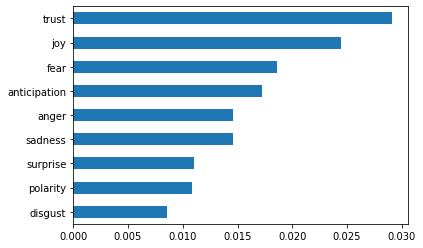

In [12]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)
TOKENS[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

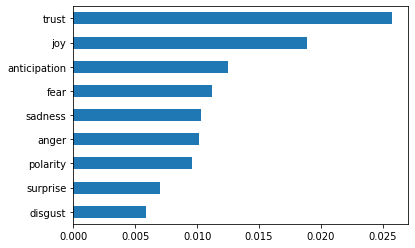

In [13]:
Theaetetus_token=TOKENS.loc['Theaetetus']
Theaetetus_token[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

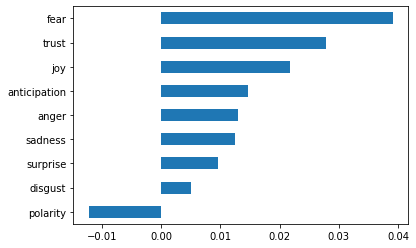

In [14]:
Sophist_token=TOKENS.loc['Sophist']
Sophist_token[emo_cols].mean().sort_values().plot.barh()

<AxesSubplot:>

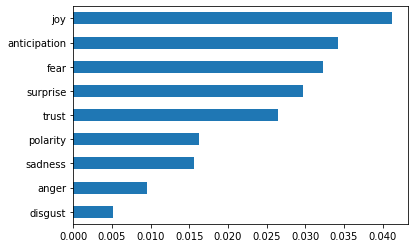

In [15]:
Statesman_token=TOKENS.loc['Statesman']
Statesman_token[emo_cols].mean().sort_values().plot.barh()

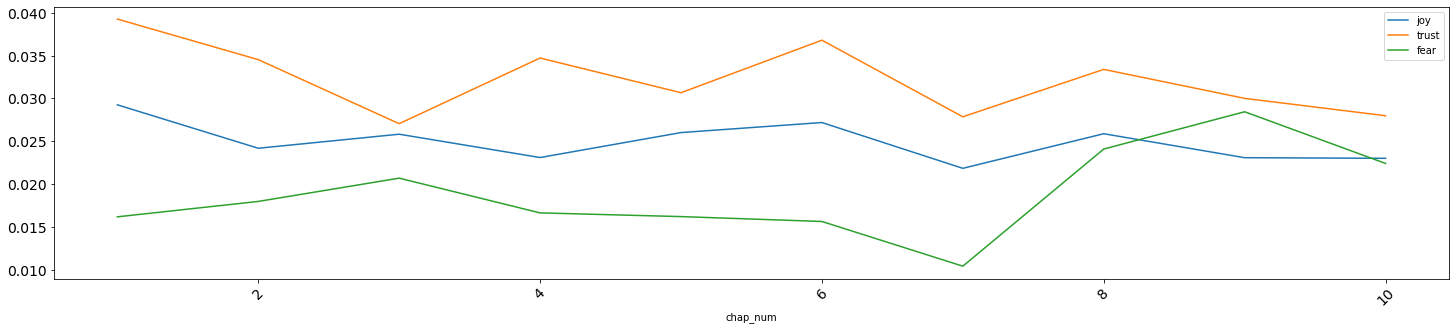

In [16]:
#Exploring the Republic
Republic = TOKENS.loc['The Republic']
Republic_sents= Republic.groupby('chap_num')[emo_cols].mean()
plot_sentiments(Republic_sents, ['joy','trust','fear'])

In [17]:
Republic['html'] =  Republic.apply(lambda x: "<span class='sent{}'>{}</span>".
       format(int(np.sign(x[emo])), x.term_str), 1)
Republic['sent_str'] = Republic.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
Republic_sents= Republic.groupby(SENTS)[emo_cols].mean()
Republic_sents['sent_str'] = Republic.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
Republic_sents['html_str'] = Republic.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))


from IPython.core.display import display, HTML
sample_sentences(Republic_sents)

/var/folders/3f/42p6mrgd1jj65bcnbf2ztbkc0000gn/T/ipykernel_32366/1694958462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Republic['html'] =  Republic.apply(lambda x: "<span class='sent{}'>{}</span>".
/var/folders/3f/42p6mrgd1jj65bcnbf2ztbkc0000gn/T/ipykernel_32366/1694958462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Republic['sent_str'] = Republic.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
/var/folders/3f/42p6mrgd1jj65bcnbf2ztbkc0000gn/T/ipykernel_32366/1694958462.py:26: De

<AxesSubplot:xlabel='book_id'>

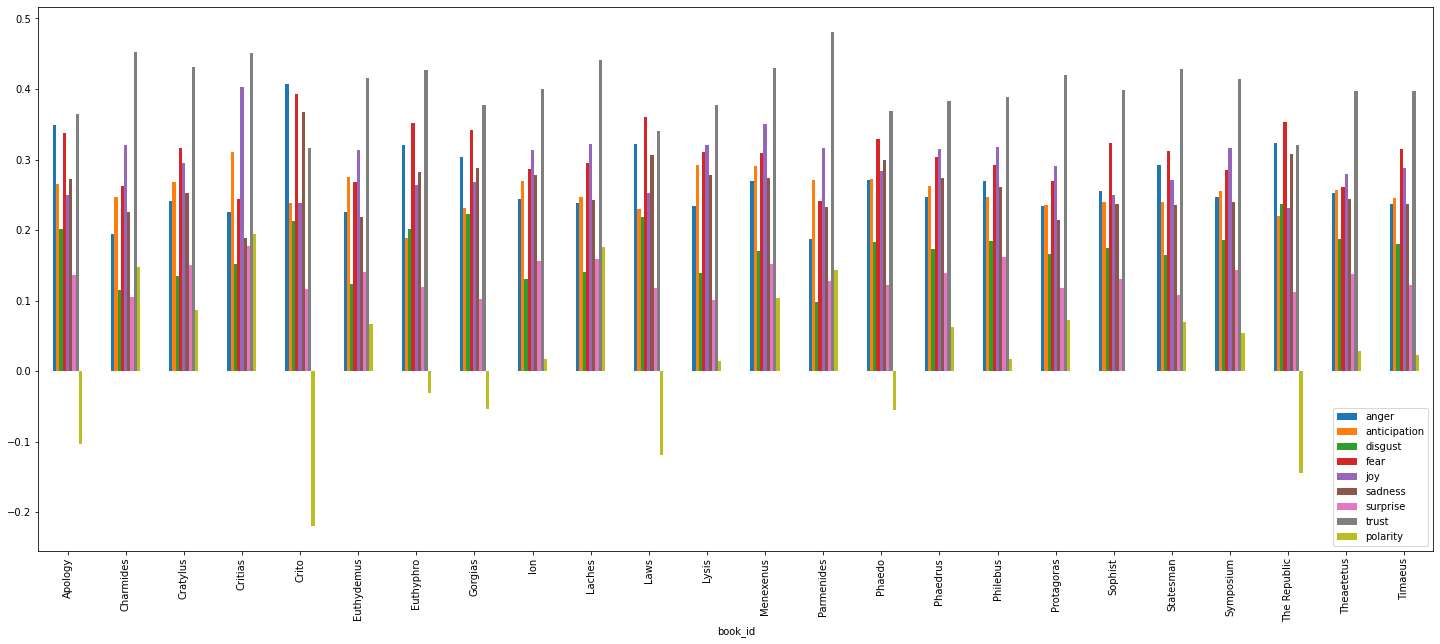

In [23]:
#By Work

V = pd.concat([VOCAB.reset_index().set_index('term_str'), salex], join='inner', axis=1)\
    .reset_index().set_index('term_str')
BOWIDX = BOW.index
B = BOW.merge(V, on='term_str', how='left').copy()
B.index = BOWIDX
B = B.dropna()

EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_BOOKS.plot.bar(figsize=(25,10))


In [24]:
EMO_BOOKS.loc[['Theaetetus','Statesman','Sophist']]

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
book_id,,,,,,,,,
Theaetetus,0.252610,0.256785,0.187891,0.260960,0.279749,0.244259,0.137787,0.396660,0.029228
Statesman,0.291990,0.240310,0.165375,0.312661,0.271318,0.235142,0.108527,0.428941,0.069767
Sophist,0.255452,0.239875,0.174455,0.323988,0.249221,0.236760,0.130841,0.398754,0.000000
